In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleaned_nan_data.csv')

In [3]:
df.isnull().sum()

Type                       0
bedroom                    0
bathroom                   0
furnishing                 0
Carpet Area (ft²)         61
Maintenance (Monthly)    113
facing                     0
Total floor                0
state                      0
Rent                       0
dtype: int64

In [4]:
# Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

Carpet Area (ft²): 0.0688% missing value
Maintenance (Monthly): 0.1274% missing value


In [5]:
df[df['Rent']>9900000]

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
226,Houses & Villas,4,4,Furnished,2700.0,NaN,others,2,Kerala,10000000
640,Apartments,2,2,Semi-Furnished,1300.0,2500.0,East,5,Karnataka,16450000


In [6]:
df.loc[226,'Rent']=1000000
df.loc[640,'Rent']=1645000

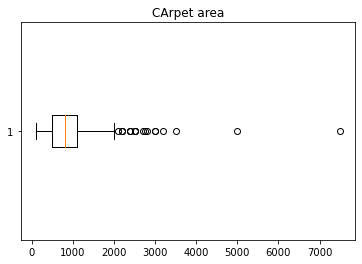

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title('CArpet area')
ax1.boxplot(df['Carpet Area (ft²)'].dropna(),vert=False)
plt.show()

## Missing values imputation using regression

In [29]:
d2=df.copy()

In [30]:
#categorical data
categorical_cols = ['Type', 'furnishing', 'facing', 'state'] 

#import pandas as pd
d2 = pd.get_dummies(d2, columns = categorical_cols)

In [31]:
d2.corr()

,bedroom,bathroom,Carpet Area (ft²),Maintenance (Monthly),Total floor,Rent,Type_Apartments,Type_Builder Floors,Type_Houses & Villas,furnishing_Furnished,...,facing_South-East,facing_South-West,facing_West,facing_others,state_ India,state_ Karnataka,state_ Kerala,state_ Maharashtra,state_ Tamil Nadu,state_ Uttar Pradesh
bedroom,1.000000,0.782119,0.577295,0.049632,0.108079,0.095463,0.034617,-0.135912,0.055632,0.042559,...,0.026248,0.042547,0.020848,0.020390,-0.024161,-0.044410,0.220156,-0.186868,-0.038731,0.076514
bathroom,0.782119,1.000000,0.502309,0.011637,0.165635,0.059635,0.119333,-0.158554,-0.017472,0.082924,...,-0.034964,0.046054,0.018483,0.009894,-0.016058,-0.051229,0.263026,-0.097067,-0.006579,-0.073636
Carpet Area (ft²),0.577295,0.502309,1.000000,-0.004422,0.048915,0.070425,0.030321,-0.126153,0.055217,0.055400,...,0.011277,0.005912,0.000083,0.016738,0.020839,0.027070,0.062924,-0.122029,0.017955,0.019338
Maintenance (Monthly),0.049632,0.011637,-0.004422,1.000000,-0.013919,-0.006099,0.033453,-0.013615,-0.025729,-0.019009,...,-0.004701,-0.003436,-0.011694,-0.008615,-0.001831,-0.019009,0.092321,-0.017854,-0.019082,-0.019656
Total floor,0.108079,0.165635,0.048915,-0.013919,1.000000,0.054912,0.450325,-0.078162,-0.417082,0.110274,...,-0.000673,0.080171,-0.018689,-0.113953,0.045673,-0.058160,-0.002190,0.125606,-0.230627,0.160547
Rent,0.095463,0.059635,0.070425,-0.006099,0.054912,1.000000,-0.000531,0.015618,-0.009990,-0.007651,...,-0.023319,0.009974,-0.036364,-0.014599,-0.008722,0.060165,-0.035689,-0.050741,0.058148,-0.036228
Type_Apartments,0.034617,0.119333,0.030321,0.033453,0.450325,-0.000531,1.000000,-0.386389,-0.782512,0.067246,...,-0.015866,0.059063,0.020395,-0.010585,-0.002522,-0.118433,-0.000150,0.302439,-0.132491,-0.044462
Type_Builder Floors,-0.135912,-0.158554,-0.126153,-0.013615,-0.078162,0.015618,-0.386389,1.000000,-0.271925,-0.009130,...,-0.015650,-0.032681,-0.011016,-0.091630,-0.017419,0.164620,-0.134348,-0.079904,-0.027793,0.059391
Type_Houses & Villas,0.055632,-0.017472,0.055217,-0.025729,-0.417082,-0.009990,-0.782512,-0.271925,1.000000,-0.063998,...,0.027118,-0.039561,-0.013842,0.072900,0.014391,0.012438,0.090849,-0.261609,0.156997,0.006297
furnishing_Furnished,0.042559,0.082924,0.055400,-0.019009,0.110274,-0.007651,0.067246,-0.009130,-0.063998,1.000000,...,0.025871,0.044952,0.044147,0.053925,-0.025235,-0.026423,0.021053,-0.036300,-0.082132,0.127433


In [32]:
cols = ["bedroom", "bathroom", "Rent","furnishing_Furnished","state_ Maharashtra" ,"Carpet Area (ft²)"]
df_c = d2[cols]

In [33]:
test_df = df_c[df_c["Carpet Area (ft²)"].isnull()]
df_c = df_c.dropna()

In [34]:
y_train = df_c["Carpet Area (ft²)"]
X_train = df_c.drop("Carpet Area (ft²)", axis=1)
X_test = test_df.drop("Carpet Area (ft²)", axis=1)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [36]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
y_pred = rf.predict(X_test)

In [38]:
#replace the missing values with predicted values
df.loc[df["Carpet Area (ft²)"].isnull(), "Carpet Area (ft²)"] = y_pred

In [39]:
cols = ["bedroom", "furnishing_Semi-Furnished",'facing_East',"Type_Apartments","state_ Kerala" ,"Maintenance (Monthly)"]
df1 = d2[cols]

In [40]:
test_df = df1[df1["Maintenance (Monthly)"].isnull()]
df1 = df1.dropna()

In [41]:
y_train = df1["Maintenance (Monthly)"]
X_train = df1.drop("Maintenance (Monthly)", axis=1)
X_test = test_df.drop("Maintenance (Monthly)", axis=1)

In [42]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
y_pred = rf.predict(X_test)

In [44]:
#replace the missing values with predicted values
df.loc[df["Maintenance (Monthly)"].isnull(), "Maintenance (Monthly)"] = y_pred

In [45]:
d2.isnull().sum()

bedroom                        0
bathroom                       0
Carpet Area (ft²)             61
Maintenance (Monthly)        113
Total floor                    0
Rent                           0
Type_Apartments                0
Type_Builder Floors            0
Type_Houses & Villas           0
furnishing_Furnished           0
furnishing_Semi-Furnished      0
furnishing_Unfurnished         0
facing_East                    0
facing_North                   0
facing_North-East              0
facing_North-West              0
facing_South                   0
facing_South-East              0
facing_South-West              0
facing_West                    0
facing_others                  0
state_ India                   0
state_ Karnataka               0
state_ Kerala                  0
state_ Maharashtra             0
state_ Tamil Nadu              0
state_ Uttar Pradesh           0
dtype: int64

In [27]:
df.head()

,bedroom,bathroom,Carpet Area (ft²),Maintenance (Monthly),Total floor,Rent,Type_Apartments,Type_Builder Floors,Type_Houses & Villas,furnishing_Furnished,...,facing_South-East,facing_South-West,facing_West,facing_others,state_ India,state_ Karnataka,state_ Kerala,state_ Maharashtra,state_ Tamil Nadu,state_ Uttar Pradesh
0,2,2,700.0,4000.0,6,42000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2,399.0,999.0,4,20000,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,550.0,5500.0,3,5500,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2,2,800.0,1000.0,4,15000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,3,1800.0,2000.0,5,31000,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [46]:
df.to_csv('model_data.csv',index=False)